## Importing Libraries

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import statsmodels.api as sm
from sklearn import metrics


## Reading Dataset

In [479]:
hazardData = pd.read_csv('/Users/pratik_4511/Desktop/Northeastern University /Quarter_5A/Capstone/final_final.csv')
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,Completion_Time_Bucket,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,recommended_action,...,per_first_name,per_last_name,per_gender,ReportSent,Supervisor,Supervisor_Name,action_status,sha_enable,immediate_action_taken.1,recommended_action.1
0,Risk Assessment,Communication,2.0,Immediate,2199.0,1.0,0.0,0.0,NaN,Update JSHA to identify the hazard of slippery...,...,Adam,Brouse,6454.0,2.0,164,Adam Brouse,COMPLETE,1,NaN,Update JSHA to identify the hazard of slippery...
1,Near Miss,Water,4.0,Immediate,2201.0,5.0,0.0,1.0,Turn off water valve,Discuss with the crews the importance of turni...,...,Sean,Thibert,6454.0,2.0,1340,Sean Thibert,COMPLETE,1,Turn off water valve,Discuss with the crews the importance of turni...
2,Stop & Correct,Working at Heights,3.0,Within 2 Months,2199.0,1.0,0.0,0.0,NaN,To not have to tie off when loading round out ...,...,Curtis,Giroux,6454.0,2.0,489,Curtis Giroux,COMPLETE,1,NaN,To not have to tie off when loading round out ...
3,Unsafe Act,Energy Sources,4.0,Within 1 Week,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...,...,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,COMPLETE,1,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...
4,Unsafe Condition,Housekeeping,3.0,More than 1 Year,2199.0,1.0,0.0,1.0,Informed Pierre B and Curtis G of the hazard a...,NaN,...,Bradley,Hofford,6454.0,2.0,489,Bradley Hofford,Complete,1,Informed Pierre B and Curtis G of the hazard a...,NaN


## Information about dataset 

In [443]:
# info
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_type                              14480 non-null  object 
 1   Hazard_identification                    14449 non-null  object 
 2   hazard_identification_score              14479 non-null  float64
 3   Completion_Time_Bucket                   14480 non-null  object 
 4   potential_risk                           14429 non-null  float64
 5   potential_risk_score                     14475 non-null  float64
 6   further_action_required                  14467 non-null  float64
 7   immediate_action_required_and_performed  14471 non-null  float64
 8   immediate_action_taken                   8698 non-null   object 
 9   recommended_action                       7473 non-null   object 
 10  immediate_action_score                   12534

In [444]:
# checking for null values
hazardData.isnull().sum()

Hazard_type                                   0
Hazard_identification                        31
hazard_identification_score                   1
Completion_Time_Bucket                        0
potential_risk                               51
potential_risk_score                          5
further_action_required                      13
immediate_action_required_and_performed       9
immediate_action_taken                     5782
recommended_action                         7007
immediate_action_score                     1946
completed_action_score                      420
Site                                          0
SiteLevel                                     0
Workplace                                     1
Duration                                   5777
per_first_name                                0
per_last_name                                 0
per_gender                                  146
ReportSent                                  293
Supervisor                              

In [466]:
hazardData.columns

Index(['Hazard_identification', 'hazard_identification_score',
       'Completion_Time_Bucket', 'potential_risk', 'potential_risk_score',
       'further_action_required', 'immediate_action_required_and_performed',
       'immediate_action_taken', 'recommended_action',
       'immediate_action_score', 'completed_action_score', 'Site', 'SiteLevel',
       'Workplace', 'ReportSent', 'Supervisor_Name', 'sha_enable',
       'Hazard_type_Employee Concern', 'Hazard_type_Follow Up',
       'Hazard_type_Near Miss', 'Hazard_type_Production',
       'Hazard_type_Quality', 'Hazard_type_Record of Misshole',
       'Hazard_type_Risk Assessment', 'Hazard_type_Safety Document',
       'Hazard_type_Stop & Correct', 'Hazard_type_Training/Qualification',
       'Hazard_type_Unsafe Act', 'Hazard_type_Unsafe Condition'],
      dtype='object')

# Removing unnecessary and duplicates.

In [480]:
# Dropping the Duplicate and unnecessary columns.

import pandas as pd

# Drop columns from the DataFrame
columns_to_drop = ['immediate_action_taken.1','recommended_action.1','Duration','Supervisor']

hazardData.drop(columns=columns_to_drop, inplace=True)


In [481]:
# Checking for duplicate values
hazardData.duplicated().sum()

76

In [482]:
hazardData = hazardData.drop_duplicates()

In [483]:
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,Completion_Time_Bucket,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,recommended_action,...,Site,SiteLevel,Workplace,per_first_name,per_last_name,per_gender,ReportSent,Supervisor_Name,action_status,sha_enable
0,Risk Assessment,Communication,2.0,Immediate,2199.0,1.0,0.0,0.0,NaN,Update JSHA to identify the hazard of slippery...,...,3311,4708,Main access drift,Adam,Brouse,6454.0,2.0,Adam Brouse,COMPLETE,1
1,Near Miss,Water,4.0,Immediate,2201.0,5.0,0.0,1.0,Turn off water valve,Discuss with the crews the importance of turni...,...,3317,4331,1860 up ramp,Sean,Thibert,6454.0,2.0,Sean Thibert,COMPLETE,1
2,Stop & Correct,Working at Heights,3.0,Within 2 Months,2199.0,1.0,0.0,0.0,NaN,To not have to tie off when loading round out ...,...,3317,4320,Nickel Rim South,Curtis,Giroux,6454.0,2.0,Curtis Giroux,COMPLETE,1
3,Unsafe Act,Energy Sources,4.0,Within 1 Week,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...,...,3317,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,6454.0,2.0,Bradley Hofford,COMPLETE,1
4,Unsafe Condition,Housekeeping,3.0,More than 1 Year,2199.0,1.0,0.0,1.0,Informed Pierre B and Curtis G of the hazard a...,NaN,...,3317,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,6454.0,2.0,Bradley Hofford,Complete,1


In [484]:
# ------> instead of dropping the null values we are replacing with 'Not Specified' <------- #   

import pandas as pd

# Replace NaN values in 'immediate_action_taken' column with 'Not Specified'
hazardData['immediate_action_taken'].fillna('Not Specified', inplace=True)

# Verify the changes
print(hazardData['immediate_action_taken'].value_counts())

# ---------------------------------------------------------------------------------- #

# Replace NaN values in 'recommended_action' column with 'Not Specified'
hazardData['recommended_action'].fillna('Not Specified', inplace=True)

# Verify the changes
print(hazardData['recommended_action'].value_counts())

Not Specified                                                                                                                                                                                                                                                                                                              5763
Yes                                                                                                                                                                                                                                                                                                                          27
 test immediate action taken                                                                                                                                                                                                                                                                                                 17
Yes                                     

## To Handle Duplicates

check duplicates 
 0 

check missing value 
 Hazard_type                                   0
Hazard_identification                        31
hazard_identification_score                   1
Completion_Time_Bucket                        0
potential_risk                               51
potential_risk_score                          5
further_action_required                      13
immediate_action_required_and_performed       9
immediate_action_taken                        0
recommended_action                            0
immediate_action_score                     1940
completed_action_score                      413
Site                                          0
SiteLevel                                     0
Workplace                                     1
per_first_name                                0
per_last_name                                 0
per_gender                                  140
ReportSent                                  293
Supervisor_Name                            

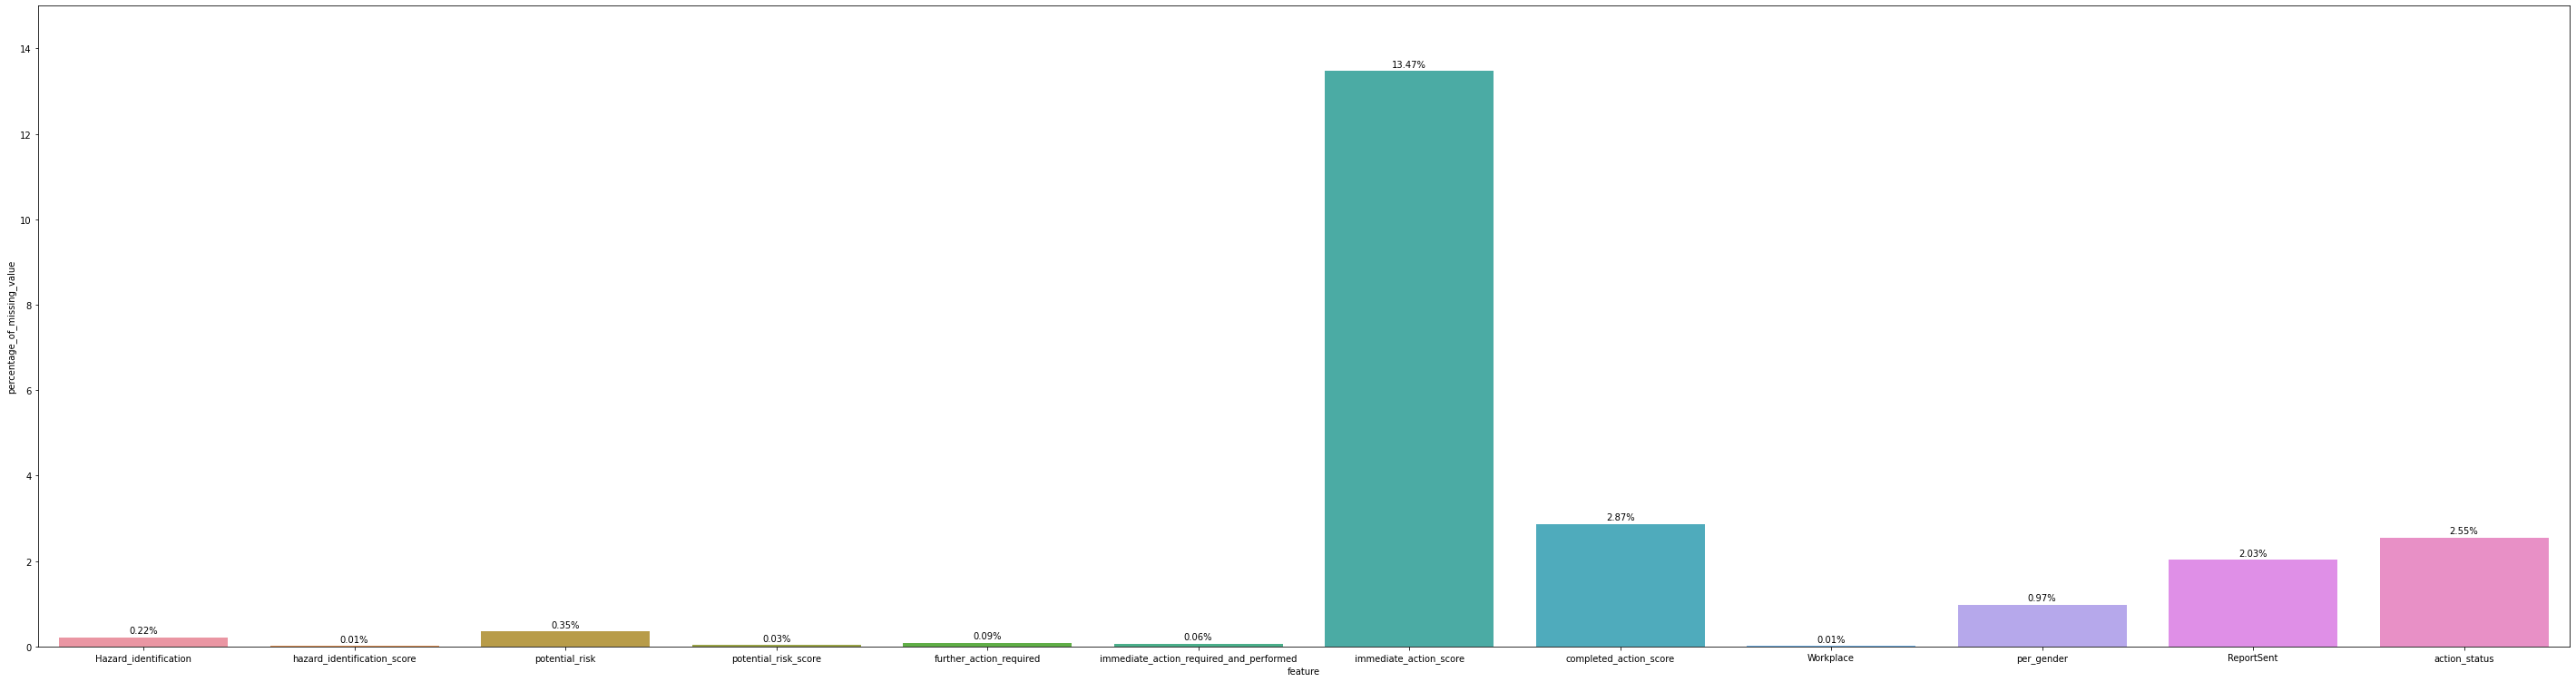

In [485]:
def missing_data(df):
    print("check duplicates \n",df.duplicated().sum(),"\n")
    print("check missing value \n",df.isna().sum(),"\n")
    #analysing missing data
    missing_data = df.isnull().sum().reset_index()
    missing_data.columns = ['feature','missing_value']
    missing_data = missing_data[missing_data['missing_value']>0].reset_index(drop = True)
    missing_data['percentage_of_missing_value'] = round((missing_data['missing_value']/len(df))*100,2)
    print("missing data \n",missing_data,"\n")
    
    ##plot missing data
    fig, ax = plt.subplots(figsize = (50,13))
    md_plot = sns.barplot(x='feature', y='percentage_of_missing_value', data = missing_data)
    ax.set_ylim(0,15)
 
    for i in md_plot.patches:
        height = i.get_height()
        md_plot.text(x = i.get_x() + (i.get_width()/2),
                y = height + 0.1,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center')
        
    title = '''Distribution of Missing Value'''
    
missing_data(hazardData)

In [486]:
hazardData = hazardData.dropna(subset=['Hazard_identification', 'potential_risk','potential_risk_score','further_action_required',
                                       'completed_action_score','Workplace','per_gender','ReportSent','action_status', 'immediate_action_score'])


## CLEANING PHASE

### Includes: - 
(1) Replaced the values of 'immediate_action_taken' & ''recommended_action' with ---> Not specified |
(2) Calculated the % of completed_action_score and Dropped the vlaues accordingly |
(3) Assigned proper Male/Female valeus to 'per_gender' column |
(4) Converted 'action_status' ---> upper case |
(5) Dropped the 'Duration' column |

In [487]:
## The per_gender vlaues are distributed in two formats : 6454 (M) and 8610 (F)

# Replace values in 'per_gender' column
hazardData['per_gender'] = hazardData['per_gender'].replace({6454.0: 'Male', 8610.0: 'Female'})

# Verify the updated DataFrame
print(hazardData['per_gender'].value_counts())

print("Null values : ",hazardData['per_gender'].isnull().sum())

# Drop rows with null values in 'per_gender' column
hazardData.dropna(subset=['per_gender'], inplace=True)

# Drop rows with null values in 'immediate_action_score' column
hazardData.dropna(subset=['immediate_action_score'], inplace=True)

hazardData.shape


Male      11252
Female       74
Name: per_gender, dtype: int64
Null values :  0


(11326, 22)

In [488]:
## The 'action_status' column has two values : 'Completed' , 'Incomplete'
# so will convert in lower case

# Convert 'action_status' values to lowercase
hazardData['action_status'] = hazardData['action_status'].str.lower()

# Verify the updated DataFrame
print(hazardData['action_status'].value_counts())

complete      11296
incomplete       30
Name: action_status, dtype: int64


In [382]:
hazardData.head(5)

,Hazard_type,Hazard_identification,hazard_identification_score,Completion_Time_Bucket,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,recommended_action,...,Site,SiteLevel,Workplace,per_first_name,per_last_name,per_gender,ReportSent,Supervisor_Name,action_status,sha_enable
1,Near Miss,Water,4.0,Immediate,2201.0,5.0,0.0,1.0,Turn off water valve,Discuss with the crews the importance of turni...,...,3317,4331,1860 up ramp,Sean,Thibert,Male,2.0,Sean Thibert,complete,1
3,Unsafe Act,Energy Sources,4.0,Within 1 Week,2201.0,5.0,1.0,1.0,Stopped work and had employee lock out.,Matt to email Bristol to inform them of incide...,...,3317,4324,"Shop, 1780L, 1820L, and Ramp",Bradley,Hofford,Male,2.0,Bradley Hofford,complete,1
5,Unsafe Condition,Housekeeping,3.0,Within 1 Week,2199.0,1.0,1.0,1.0,Informed Pierre B and Curtis G of the housekee...,Have crews complete final clean up of storages.,...,3317,4329,NRD ramp from top to 1820L,Bradley,Hofford,Male,2.0,Bradley Hofford,complete,1
6,Unsafe Condition,Ergonomics,2.0,Within 1 Week,2200.0,3.0,1.0,1.0,Informed Pierre B. of the hazard.,Have crews clean up the area and move the bump...,...,3317,4329,NRD ramp from top to 1820L,Bradley,Hofford,Male,2.0,Bradley Hofford,complete,1
8,Unsafe Condition,Mobile Equip./Vehicles,3.0,Immediate,2200.0,3.0,0.0,1.0,Had operator lower forks for proper parking po...,None,...,3317,4329,NRD ramp from top to 1820L,Bradley,Hofford,Male,2.0,Bradley Hofford,complete,1


# Visulaization

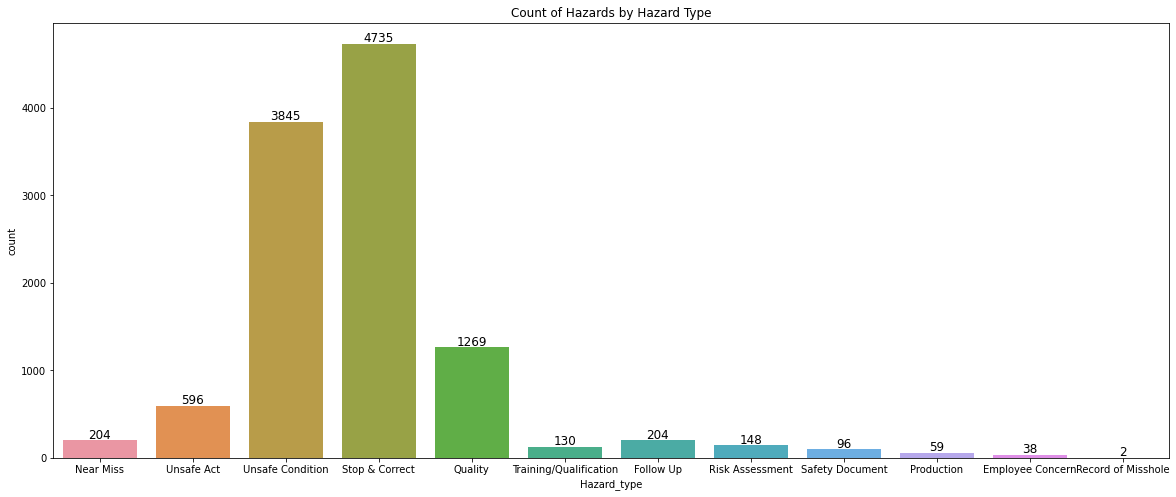

In [489]:
# Bar chart for count of hazards based on Hazard Type
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Hazard_type', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Hazards by Hazard Type')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


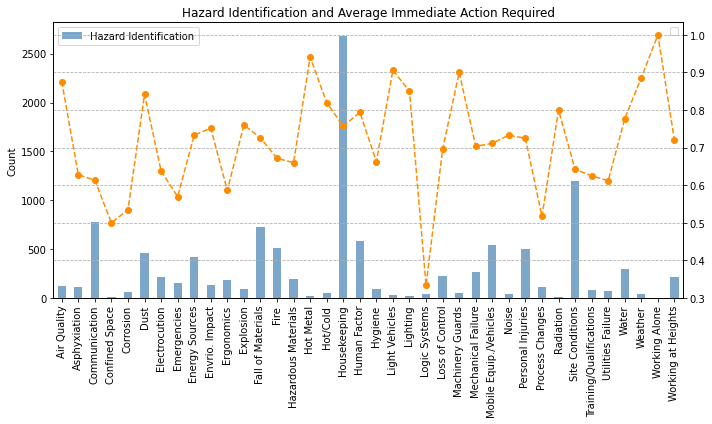

In [491]:
# Prepare the data for the bar chart
bar_data = hazardData['Hazard_identification'].value_counts().sort_index()

# Prepare the data for the line chart
line_data = hazardData.groupby('Hazard_identification')['immediate_action_required_and_performed'].mean().sort_index()

# Create the combination graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar chart
bar_data.plot(kind='bar', color='steelblue', alpha=0.7, label='Hazard Identification', ax=ax1)
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line chart
ax2 = ax1.twinx()
line_data.plot(secondary_y=True, color='darkorange', linestyle='--', marker='o', label='Avg. Immediate Action Required', ax=ax2)
ax2.set_ylabel('Average Immediate Action Required')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the graph
plt.title('Hazard Identification and Average Immediate Action Required')
plt.xlabel('Hazard Identification')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


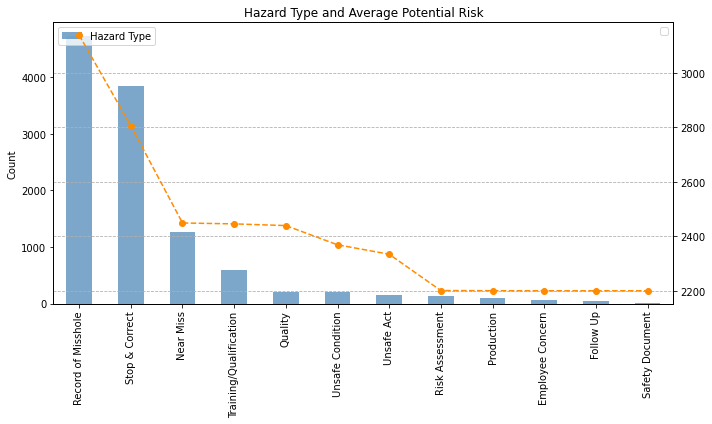

In [492]:
# Prepare the data for the bar chart
bar_data = hazardData['Hazard_type'].value_counts().sort_values(ascending=False)

# Prepare the data for the line chart
line_data = hazardData.groupby('Hazard_type')['potential_risk'].mean().sort_values(ascending=False)

# Create the combination graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar chart
bar_data.plot(kind='bar', color='steelblue', alpha=0.7, label='Hazard Type', ax=ax1)
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line chart
ax2 = ax1.twinx()
line_data.plot(secondary_y=True, color='darkorange', linestyle='--', marker='o', label='Average Potential Risk', ax=ax2)
ax2.set_ylabel('Average Potential Risk')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the graph
plt.title('Hazard Type and Average Potential Risk')
plt.xlabel('Hazard Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

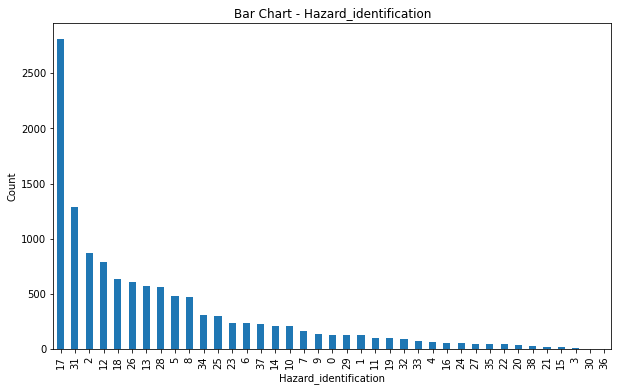

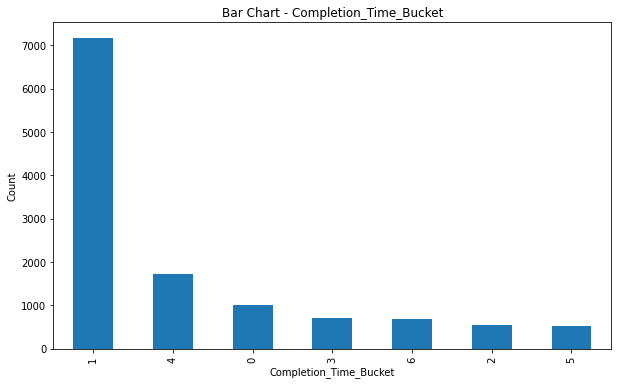

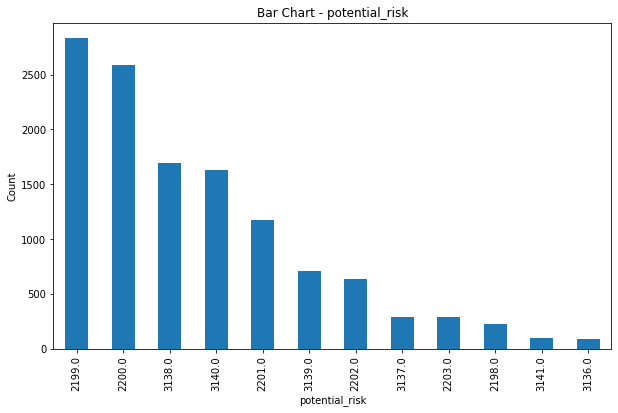

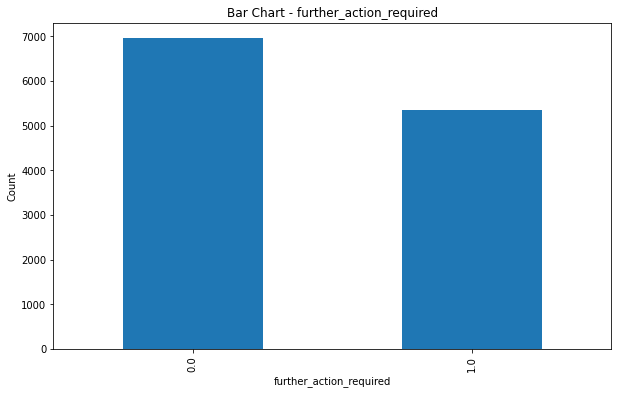

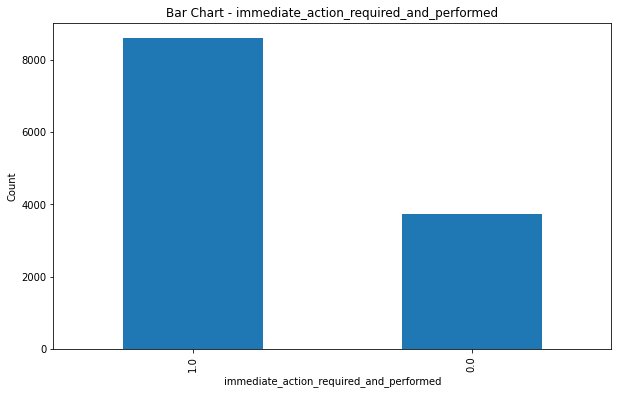

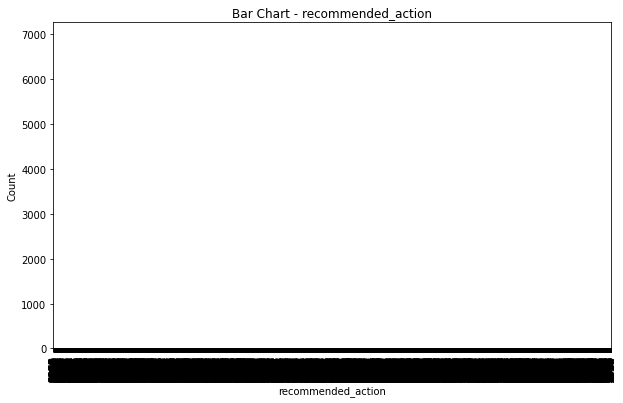

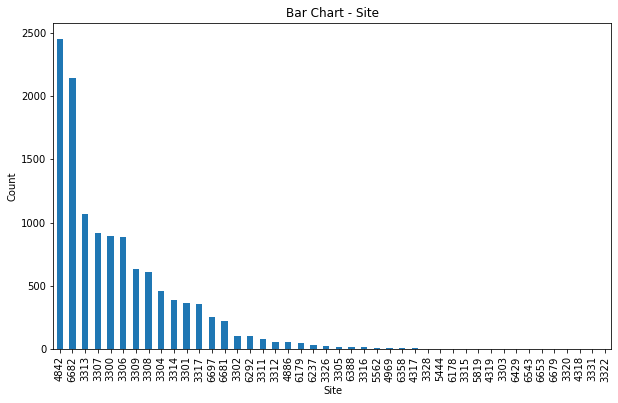

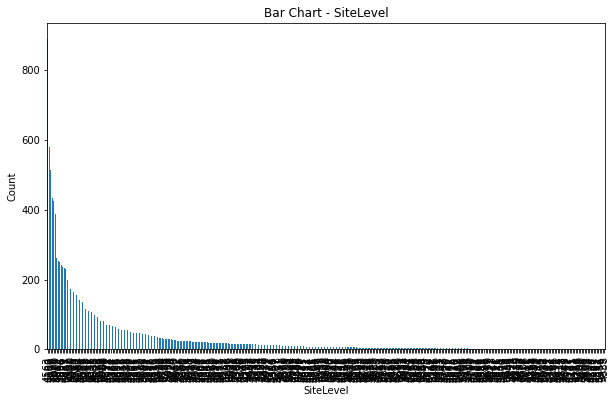

KeyboardInterrupt: 

In [476]:
# Categorical columns to visualize
categorical_columns = ['Hazard_identification', 'Completion_Time_Bucket', 'potential_risk', 'further_action_required',
                       'immediate_action_required_and_performed', 'recommended_action', 'Site', 'SiteLevel',
                       'Workplace', 'ReportSent', 'Supervisor_Name', 'sha_enable', 'Hazard_type_Employee Concern',
                       'Hazard_type_Follow Up', 'Hazard_type_Near Miss', 'Hazard_type_Production',
                       'Hazard_type_Quality', 'Hazard_type_Record of Misshole', 'Hazard_type_Risk Assessment',
                       'Hazard_type_Safety Document', 'Hazard_type_Stop & Correct',
                       'Hazard_type_Training/Qualification', 'Hazard_type_Unsafe Act',
                       'Hazard_type_Unsafe Condition']

# Plot bar charts for each categorical column
for column in categorical_columns:
    column_values = hazardData[column].value_counts()
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    column_values.plot(kind='bar')
    plt.title(f'Bar Chart - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

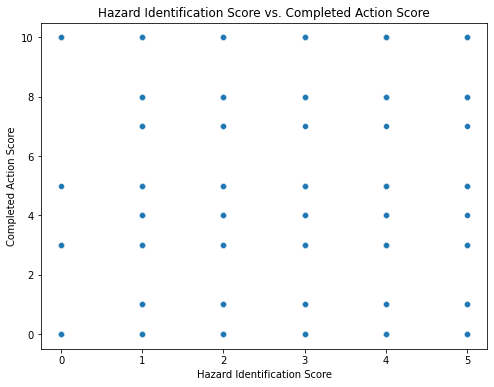

In [469]:
# Scatter plot between 'hazard_identification_score' and 'completed_action_score'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hazardData, x='hazard_identification_score', y='completed_action_score')
plt.title('Hazard Identification Score vs. Completed Action Score')
plt.xlabel('Hazard Identification Score')
plt.ylabel('Completed Action Score')
plt.show()

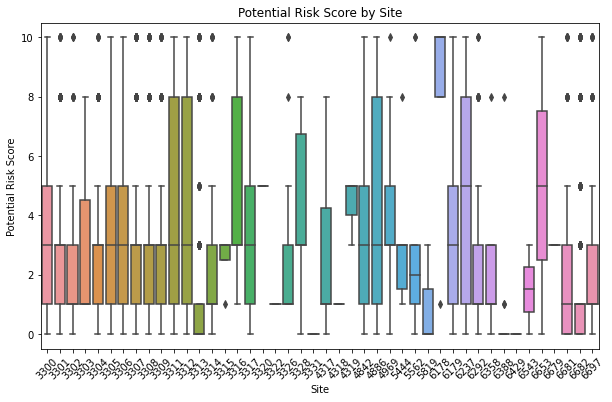

In [470]:
# Box plot for 'potential_risk_score' by 'Site'
plt.figure(figsize=(10, 6))
sns.boxplot(data=hazardData, x='Site', y='potential_risk_score')
plt.title('Potential Risk Score by Site')
plt.xlabel('Site')
plt.ylabel('Potential Risk Score')
plt.xticks(rotation=45)
plt.show()


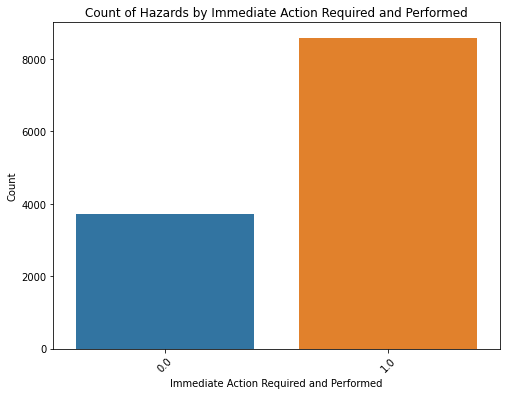

In [471]:
# Count plot for 'immediate_action_required_and_performed'
plt.figure(figsize=(8, 6))
sns.countplot(data=hazardData, x='immediate_action_required_and_performed')
plt.title('Count of Hazards by Immediate Action Required and Performed')
plt.xlabel('Immediate Action Required and Performed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [473]:
# Bar chart of potential risk score by site and hazard type
plt.figure(figsize=(12, 6))
sns.barplot(data=hazardData, x='Site', y='potential_risk_score', hue='Hazard_type')
plt.title('Potential Risk Score by Site and Hazard Type')
plt.xlabel('Site')
plt.ylabel('Potential Risk Score')
plt.xticks(rotation=45)
plt.legend(title='Hazard Type')
plt.show()

ValueError: Could not interpret input 'Hazard_type'

<Figure size 864x432 with 0 Axes>

In [472]:
# Countplot of hazard type and immediate action required and performed
plt.figure(figsize=(10, 6))
sns.countplot(data=hazardData, x='Hazard_type', hue='immediate_action_required_and_performed')
plt.title('Count of Hazards by Hazard Type and Immediate Action')
plt.xlabel('Hazard Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Immediate Action')
plt.show()

ValueError: Could not interpret input 'Hazard_type'

<Figure size 720x432 with 0 Axes>

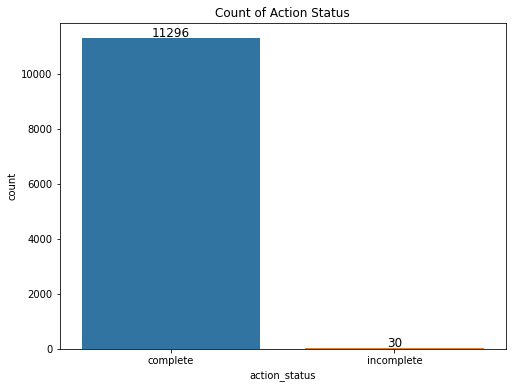

In [406]:
# Bar chart for count of hazards based on Action Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='action_status', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Action Status')
plt.show()

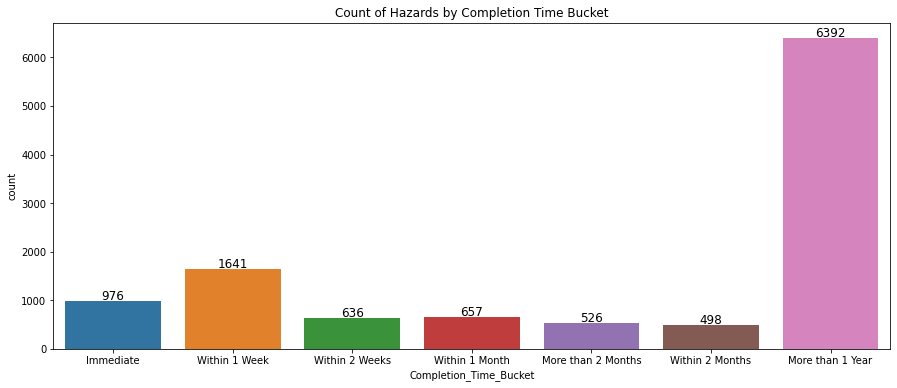

In [407]:
# Bar chart for count of hazards based on Completion_Time_Bucket
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Completion_Time_Bucket', data=hazardData)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Count of Hazards by Completion Time Bucket')
plt.show()

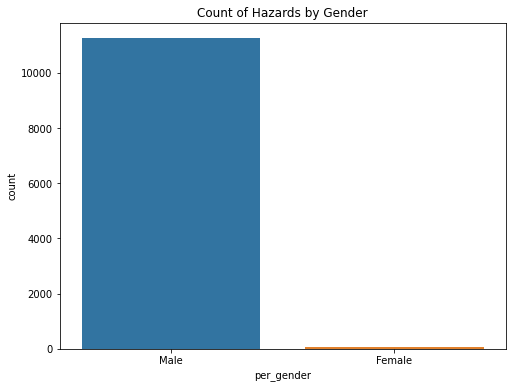

In [408]:
# Bar chart for count of hazards based on Gender
plt.figure(figsize=(8,6))
sns.countplot(x='per_gender', data=hazardData)
plt.title('Count of Hazards by Gender')
plt.show()

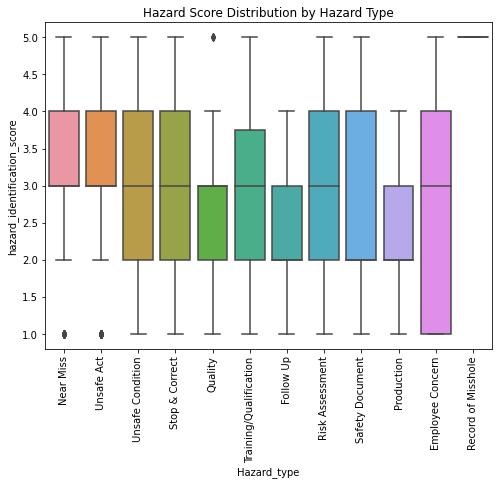

In [409]:
# Box plot for hazard score distribution based on Hazard_type
plt.figure(figsize=(8,6))
sns.boxplot(x='Hazard_type', y='hazard_identification_score', data=hazardData)
plt.title('Hazard Score Distribution by Hazard Type')
plt.xticks(rotation=90)
plt.show()

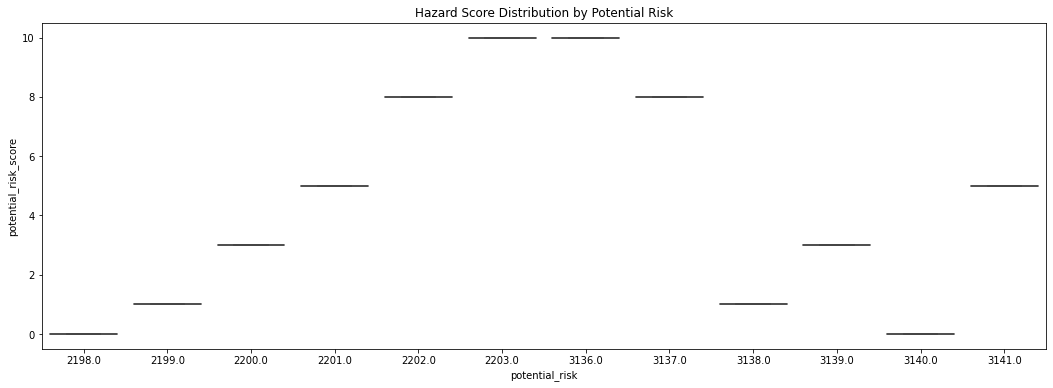

In [410]:
# Box plot for hazard score distribution based on potential_risk
plt.figure(figsize=(18,6))
sns.boxplot(x='potential_risk', y='potential_risk_score', data=hazardData)
plt.title('Hazard Score Distribution by Potential Risk')
plt.show()

In [453]:
columns_to_drop1 = ['per_gender','action_status']

hazardData.drop(columns=columns_to_drop1, inplace=True)


## Histogram

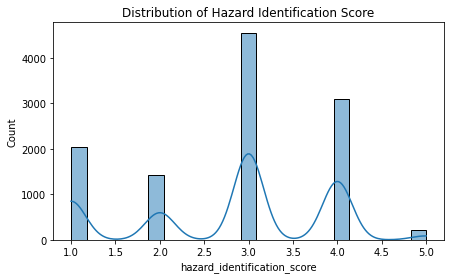

In [412]:
# Histogram for hazard_identification_score
plt.figure(figsize=(7,4))
sns.histplot(data=hazardData, x='hazard_identification_score', kde=True)
plt.title('Distribution of Hazard Identification Score')
plt.show()

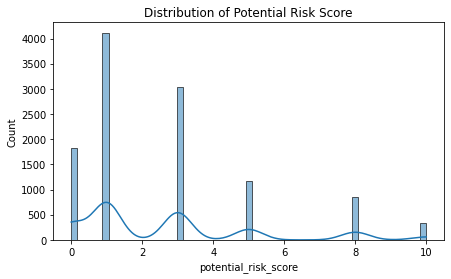

In [392]:
# Histogram for potential_risk_score
plt.figure(figsize=(7,4))
sns.histplot(data=hazardData, x='potential_risk_score', kde=True)
plt.title('Distribution of Potential Risk Score')
plt.show()

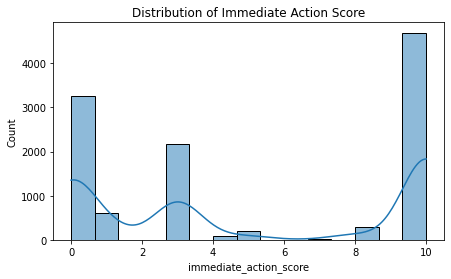

In [331]:
# Histogram for immediate_action_score
plt.figure(figsize=(7,4))
sns.histplot(data=hazardData, x='immediate_action_score', kde=True)
plt.title('Distribution of Immediate Action Score')
plt.show()

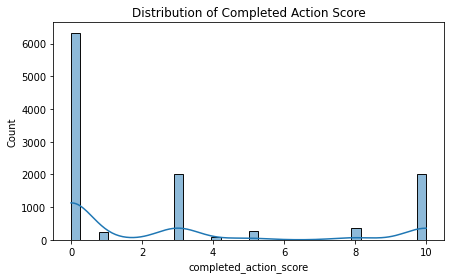

In [332]:
# Histogram for completed_action_score
plt.figure(figsize=(7,4))
sns.histplot(data=hazardData, x='completed_action_score', kde=True)
plt.title('Distribution of Completed Action Score')
plt.show()

## Correlation Plot

# Imputing the values using the decision tree

In [454]:
cols = ['Hazard_type', 'Hazard_identification', 'Completion_Time_Bucket', 'immediate_action_taken', 'recommended_action', 'Workplace', 'Supervisor_Name']
print(hazardData[cols].nunique())

Hazard_type                 12
Hazard_identification       38
Completion_Time_Bucket       7
immediate_action_taken    8273
recommended_action        5341
Workplace                 4292
Supervisor_Name            333
dtype: int64


In [465]:

cols1 = ['Hazard_type']

balanced_data = pd.get_dummies(balanced_data, columns=cols1)


KeyError: "None of [Index(['Hazard_type'], dtype='object')] are in the [columns]"

In [456]:
from sklearn.preprocessing import LabelEncoder

cols2 = ['Hazard_identification', 'immediate_action_taken', 'recommended_action', 'Workplace', 'Completion_Time_Bucket']

encoder = LabelEncoder()
for col in cols2:
    hazardData[col] = encoder.fit_transform(balanced_data[col])

# Print the updated DataFrame
print(hazardData)

       Hazard_identification  hazard_identification_score  \
1                         34                          4.0   
3                          8                          4.0   
4                         17                          3.0   
5                         17                          3.0   
6                         10                          2.0   
...                      ...                          ...   
14469                      0                          4.0   
14470                      0                          4.0   
14473                      0                          4.0   
14474                      0                          4.0   
14475                      0                          4.0   

       Completion_Time_Bucket  potential_risk  potential_risk_score  \
1                           0          2201.0                   5.0   
3                           4          2201.0                   5.0   
4                           1          2199.0         

In [457]:
columns_to_drop2 = ['per_first_name','per_last_name']

hazardData.drop(columns=columns_to_drop2, inplace=True)


In [416]:
hazardData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11326 entries, 1 to 14474
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_identification                    11326 non-null  int64  
 1   hazard_identification_score              11326 non-null  float64
 2   Completion_Time_Bucket                   11326 non-null  int64  
 3   potential_risk                           11326 non-null  float64
 4   potential_risk_score                     11326 non-null  float64
 5   further_action_required                  11326 non-null  float64
 6   immediate_action_required_and_performed  11326 non-null  float64
 7   immediate_action_taken                   11326 non-null  int64  
 8   recommended_action                       11326 non-null  int64  
 9   immediate_action_score                   11326 non-null  float64
 10  completed_action_score                   11326

In [350]:
hazardData.head(5)

,Hazard_identification,hazard_identification_score,Completion_Time_Bucket,potential_risk,potential_risk_score,further_action_required,immediate_action_required_and_performed,immediate_action_taken,recommended_action,immediate_action_score,...,Hazard_type_Near Miss,Hazard_type_Production,Hazard_type_Quality,Hazard_type_Record of Misshole,Hazard_type_Risk Assessment,Hazard_type_Safety Document,Hazard_type_Stop & Correct,Hazard_type_Training/Qualification,Hazard_type_Unsafe Act,Hazard_type_Unsafe Condition
1,34,4.0,0,2201.0,5.0,0.0,1.0,7138,1076,10.0,...,1,0,0,0,0,0,0,0,0,0
3,8,4.0,4,2201.0,5.0,1.0,1.0,6394,2599,10.0,...,0,0,0,0,0,0,0,0,1,0
5,17,3.0,4,2199.0,1.0,1.0,1.0,2765,1846,3.0,...,0,0,0,0,0,0,0,0,0,1
6,10,2.0,4,2200.0,3.0,1.0,1.0,2768,1845,3.0,...,0,0,0,0,0,0,0,0,0,1
8,26,3.0,0,2200.0,3.0,0.0,1.0,2373,2943,10.0,...,0,0,0,0,0,0,0,0,0,1


In [352]:
hazardData.isnull().sum()

Hazard_identification                      0
hazard_identification_score                0
Completion_Time_Bucket                     0
potential_risk                             0
potential_risk_score                       0
further_action_required                    0
immediate_action_required_and_performed    0
immediate_action_taken                     0
recommended_action                         0
immediate_action_score                     0
completed_action_score                     0
Site                                       0
SiteLevel                                  0
Workplace                                  0
per_first_name                             0
per_last_name                              0
per_gender                                 0
ReportSent                                 0
Supervisor_Name                            0
action_status                              0
sha_enable                                 0
Hazard_type_Employee Concern               0
Hazard_typ

In [354]:
hazardData['Completion_Time_Bucket'].unique()

array([0, 4, 6, 3, 2, 5, 1])

In [458]:
hazardData['Completion_Time_Bucket'].value_counts()

1    7171
4    1712
0     999
3     706
6     673
2     544
5     519
Name: Completion_Time_Bucket, dtype: int64

## XGBoost Model

In [418]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [421]:
hazardData.drop(columns='Supervisor_Name', inplace=True)

In [464]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 1827 to 14348
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Hazard_identification                    40431 non-null  object 
 1   hazard_identification_score              40430 non-null  float64
 2   Completion_Time_Bucket                   40431 non-null  object 
 3   potential_risk                           40355 non-null  float64
 4   potential_risk_score                     40431 non-null  float64
 5   further_action_required                  40368 non-null  float64
 6   immediate_action_required_and_performed  40382 non-null  float64
 7   immediate_action_taken                   40431 non-null  object 
 8   recommended_action                       40431 non-null  object 
 9   immediate_action_score                   40431 non-null  float64
 10  completed_action_score                   40

In [462]:
#### ---------> Training and Testing split <----------- ###

x = balanced_data.drop(['Completion_Time_Bucket'],axis=1)
y = balanced_data['Completion_Time_Bucket']

feature_names = x.columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [423]:
### ----------> Applying SMOTE <---------- ###

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print("Before Upsampling, counts of label '1': {}".format(sum(y_train==1))) 
print("Before Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print("Before Upsampling, counts of label '3': {}".format(sum(y_train==3))) 
print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
print("Before Upsampling, counts of label '5': {}".format(sum(y_train==5)))
print("Before Upsampling, counts of label '6': {}\n".format(sum(y_train==6))) 

sampling_ratio = 0.5  # Adjust the desired sampling ratio as needed
desired_samples = min(int(sum(y_train==1) * sampling_ratio), sum(y_train==1))

over = SMOTE(sampling_strategy={0: desired_samples, 1: desired_samples, 2: desired_samples, 3: desired_samples, 4: desired_samples, 5: desired_samples, 6: desired_samples}, k_neighbors=6, random_state=1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=1)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

x_train, y_train = pipeline.fit_resample(x_train, y_train)

print("After Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print("After Upsampling, counts of label '1': {}".format(sum(y_train==1))) 
print("After Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print("After Upsampling, counts of label '3': {}".format(sum(y_train==3))) 
print("After Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
print("After Upsampling, counts of label '5': {}".format(sum(y_train==5)))
print("After Upsampling, counts of label '5': {}".format(sum(y_train==6)))



Before Upsampling, counts of label '0': 680
Before Upsampling, counts of label '1': 4486
Before Upsampling, counts of label '2': 383
Before Upsampling, counts of label '3': 462
Before Upsampling, counts of label '4': 1139
Before Upsampling, counts of label '5': 337
Before Upsampling, counts of label '6': 441



ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 4486 samples and 2243 samples are asked.

In [459]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'data' containing the column 'your_variable' with 7 classes

# Step 1: Identify the variable with the maximum number of rows
variable_max = 'Completion_Time_Bucket'  # Replace with the column name of the variable with the maximum rows

# Step 2: Calculate the number of rows for each class
class_counts = hazardData[variable_max].value_counts()

# Step 3: Find the class with the minimum number of rows
class_min = class_counts.idxmin()

# Step 4: Calculate the difference in number of rows
difference = class_counts.max() - class_counts.min()

# Step 5: Randomly sample rows from variable_max for the other 6 classes to match the number of rows in class_min
balanced_data = pd.DataFrame(columns=hazardData.columns)
for class_label in class_counts.index:
    if class_label == class_min:
        balanced_data = balanced_data.append(hazardData[hazardData[variable_max] == class_label])
    else:
        balanced_data = balanced_data.append(hazardData[hazardData[variable_max] == class_label].sample(n=difference, replace=True, random_state=42))

# balanced_data will contain the balanced dataset with equal number of rows for each class in the variable


/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_19443/3604758335.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_19443/3604758335.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_19443/3604758335.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_19443/3604758335.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/0j/7r8blzjd6q97qbmmc643xsvw0000gn/T/ipykernel_19443/3604758335.py:24: FutureWarning:

The frame.append method is de

In [461]:
balanced_data['Completion_Time_Bucket'].value_counts()

1    6652
4    6652
0    6652
3    6652
6    6652
2    6652
5     519
Name: Completion_Time_Bucket, dtype: int64

In [435]:
class_counts = balanced_data.value_counts()

In [439]:
print(balanced_data['variable_max'].value_counts())


KeyError: 'variable_max'

In [425]:
#X = hazardData.drop('completion_time_bucket', axis=1)  # Replace with your feature variables
#y = hazardData['completion_time_bucket']  # Replace with your target variable

# Step 2: Create an instance of SMOTE
smote = SMOTE()

# Step 3: Apply SMOTE to balance the data
x_train, y_train = smote.fit_resample(x, y)

# Step 4: Create a new DataFrame with the balanced data
hazardData = pd.concat([x_train, y_train], axis=1)

In [426]:
print("Before Upsampling, counts of label '0': {}".format(sum(y_train==0))) 
print("Before Upsampling, counts of label '1': {}".format(sum(y_train==1))) 
print("Before Upsampling, counts of label '2': {}".format(sum(y_train==2))) 
print("Before Upsampling, counts of label '3': {}".format(sum(y_train==3))) 
print("Before Upsampling, counts of label '4': {}".format(sum(y_train==4))) 
print("Before Upsampling, counts of label '5': {}".format(sum(y_train==5)))
print("Before Upsampling, counts of label '6': {}\n".format(sum(y_train==6))) 

Before Upsampling, counts of label '0': 6392
Before Upsampling, counts of label '1': 6392
Before Upsampling, counts of label '2': 6392
Before Upsampling, counts of label '3': 6392
Before Upsampling, counts of label '4': 6392
Before Upsampling, counts of label '5': 6392
Before Upsampling, counts of label '6': 6392



In [463]:
### ---------> RFE with Cross Validation <--------- #### 

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model1 = XGBClassifier()

# create RFE selector with cross-validation and fit it to the data
rfecv = RFECV(estimator = model1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x_train, y_train)

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

ValueError: could not convert string to float: 'Mathieu Lachance'

In [366]:
### -------> Feature selection with RFE <-------- ###
rfe = RFE(model1, n_features_to_select=17)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

print(f"{type(model1).__name__}")
print("Selected Features from this model : \n", selected_features_df)

ValueError: could not convert string to float: 'James'

In [302]:
### --------> Grid Search <--------- ###

from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid for grid search
params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 500, 1000]
}

# create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=model1, param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')

# fit the grid search object to the data
grid_search.fit(X_train_rfe, y_train)

# print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}
Best score:  0.6557981721039519


In [303]:
start_time = time.time() 

model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500)

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 70.34 seconds
XGBClassifier: Selected features = 17, Accuracy = 0.66, Precision = 0.6587556952052673
Classification Report : 
               precision    recall  f1-score   support

           0       0.37      0.37      0.37       411
           1       0.98      0.98      0.98      1930
           2       0.33      0.28      0.30       198
           3       0.30      0.29      0.29       290
           4       0.43      0.55      0.48       634
           5       0.34      0.28      0.31       230
           6       0.27      0.17      0.21       272

    accuracy                           0.66      3965
   macro avg       0.43      0.42      0.42      3965
weighted avg       0.66      0.66      0.66      3965

